# COMP0124 MAAI Individual Coursework 

This individual Coursework has three parts, which is worth 50 points (50% of your overall score). The first part is about the Matrix Game, the second part focuses on Stochastic Game, and the last part concerns Deep Multi-Agent Reinforcement Learning.

## Instructions
1.   To start this CW, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   This is a coding assignment, please write your code at `### TODO ###` blocks or in a new cell. For Part III, you are free to use as many blocks as you need.
3.   Before submitting your notebook, **make sure that it runs without errors**, we also provide a validation tool in the end of this notebook.
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell.
  - Please do not change any methods or variables' name in the notebook, otherwise, you cannot get marking correctly.
  - We would not help you debug the code, if we cannot run your submitted notebook, you will get zero point. 
4.  Download your notebook and submit it on Moodle.
  - Click on "File -> Download .ipynb".
  - Rename your notebook to ***firstname_lastname_studentnumber.ipynb***. (Please strictly follow the naming requirement.)
  - Upload to Moodle.
5. This CW would due by **23:55 20/03/2020**, please checkout the [submission entrance](https://moodle.ucl.ac.uk/mod/assign/view.php?id=16859015) in the Moodle.
6. If you have any question, please contact TAs: [Ying Wen](mailto:ying.wen@cs.ucl.ac.uk) and [Minne Li](minne.li@cs.ucl.ac.uk).

## Part I: Matrix Game (15 points)

We start with the simplest setting: Matrix Game (a.k.a Stage Game/Normal Form Game). In this part, you will try to solve the matrix game with full knowledge of the payoff for each player in the game.



Given a two-player, two-action matrix game, we have the payoff matrices as follows:
$$
\mathbf{R}^1 = \left[\begin{matrix}
0 & 3 \\
1 &2
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right]
$$

Each player selects an action from the action space $\{1,2\}$ which determines the payoffs to the players. If the player 1 chooses action $i$ and the player 2 chooses action $j$, then the player 1 and player2 receive the rewards $r^1_{ij}$ and $r^2_{ij}$ respectively. For example, if both players choose action $1$, then the player 1 would have $r^1_{11}=0$ and player 1 would receive $r^2_{11}=3$.

Then, we can use $\alpha\in [0,1] $ represents the strategy for player 1, where $\alpha$ corresponds to the probability of player 1 selecting the first action (action 1), and $1-\alpha$ is the probability of choosing the second action (action 2). Similarly, we use $\beta$ to be the strategy for player 2.

Given the pair of strategies $(\alpha, \beta)$, we can have the expected payoffs for two players. Denote $V^1(\alpha, \beta)$ and $V^2(\alpha, \beta)$ as the expected payoffs for two players respectively:

$$
\begin{aligned} V^{1}(\alpha, \beta) &=\alpha \beta r^1_{11}+\alpha(1-\beta) r^1_{12}+(1-\alpha) \beta r^1_{21}+(1-\alpha)(1-\beta) r^1_{22} \\ &=u^1 \alpha \beta+\alpha\left(r^1_{12}-r^1_{22}\right)+\beta\left(r_{21}-r^1_{22}\right)+r^1_{22} \end{aligned}
$$
$$
\begin{aligned} V^{2}(\alpha, \beta) &=\alpha \beta r^2_{11}+\alpha(1-\beta) r^2_{12}+(1-\alpha) \beta r^2_{21}+(1-\alpha)(1-\beta) r^2_{22} \\ &=u^2 \alpha \beta+\alpha\left(r^2_{12}-r^2_{22}\right)+\beta\left(r_{21}-r^2_{22}\right)+r^2_{22}\end{aligned}
$$

where

$$
\begin{aligned} u^1 &=r^1_{11}-r^1_{12}-r^1_{21}+r^1_{22} \\  u^2 &=r^2_{11}-r^2_{12}-r^2_{21}+r^2_{22} .\end{aligned}
$$



#### Set up matrix game (4 points)



In [ ]:
import numpy as np
from copy import deepcopy


def U(payoff):
    ########### TODO: Compute u (1 point) ###########
    u = payoff[0, 0] - payoff[0, 1] - payoff[1, 0] + payoff[1, 1]
    ########### END TODO ############################
    return u
  
    
# expected payoff
def V(alpha, beta, payoff):
    ########### TODO: Compute expected payoff of given strategies alpha and beta (1 point) ###########
    u = U(payoff)
    v = u * alpha * beta + alpha * (payoff[0, 1] - payoff[1, 1]) + beta * (payoff[1, 0] - payoff[1, 1]) + payoff[1, 1]
    ########### END TODO ##############################################################################
    return v


payoff_0 = np.array([[0, 3], 
                     [1, 2]])
payoff_1 = np.array([[3, 2], 
                     [0, 1]])

pi_alpha = 0. # init policy for player 1
pi_beta = 0.9 # init policy for player 2

########### TODO:Give nash strategy of given matrix game (2 points) ###########
pi_alpha_nash = 0.5  # nash strategy for player 1
pi_beta_nash = 0.5 # nash strategy for player 2
########### END TODO ###############################################################

u_alpha = U(payoff_0)
u_beta = U(payoff_1)

#### Infinitesimal Gredient Ascent (IGA) (3 points)

To find the optimal strategies, here we use the [Infinitesimal Gradient Ascent (IGA)](https://www.sciencedirect.com/science/article/pii/S0004370202001212) to adjust the strategies at each iteration by considering the effect of changing its strategy on its expected payoffs.  These effects can be captured by calculating the partial derivatives of its expected payoff with respect to its strategy.

$$
\begin{aligned} \frac{\partial V^{1}(\alpha, \beta)}{\partial \alpha} &=\beta u^1+\left(r^1_{12}-r^1_{22}\right) \\ \frac{\partial V^{2}(\alpha, \beta)}{\partial \beta} &=\alpha u^2+\left(r^2_{21}-r^2_{22}\right). \end{aligned}
$$

Accodirng the gradient from partial derivatives, players could adjust the strategies in the direction of current gradient with some step size $\eta$. If $(\alpha_k, \beta_k)$ is the strategy pair at $k$th iteration, then using IGA update the strategies would get the new strategies:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [ ]:
def IGA(pi_alpha,
        pi_beta,
        payoff_0,
        payoff_1,
        u_alpha,
        u_beta,
        iteration=1000, # iteration number
        eta=0.01 # step size
       ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA (3 points) ###########
        pi_alpha_gradient = pi_beta * u_alpha + payoff_0[0, 1] - payoff_0[1, 1]
        pi_beta_gradient = pi_alpha * u_beta + payoff_1[1, 0] - payoff_1[1, 1]
        pi_alpha_next = pi_alpha + eta * pi_alpha_gradient
        pi_beta_next = pi_beta + eta * pi_beta_gradient
        ########### END TODO ###############################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### WoLF-IGA (4 points)

The above IGA algorithm uses constant step size. A specific method for varying the learning rate here is [IGA WoLF (Win or Learn Fast)](https://www.sciencedirect.com/science/article/pii/S0004370202001212),  it allows the step size varies over time. Let $\alpha^{e}$ and $\beta^{e}$ represent the equilibrium strategies of two players, now we have new updated rules for WoLF-IGA algorithm:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta_k^{1} \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta_k^{2}  \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

where

$$
\eta_{k}^{1}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^1\left(\alpha_{k}, \beta_{k}\right)>V^1\left(\alpha^{e}, \beta_{k}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$
$$
\eta_{k}^{2}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^2\left(\alpha_{k}, \beta_{k}\right)>V^2\left(\alpha_{k}, \beta^{e}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$.



In [ ]:
def WoLF_IGA(pi_alpha,
             pi_beta, 
             payoff_0, 
             payoff_1,
             u_alpha,
             u_beta,
             pi_alpha_nash, 
             pi_beta_nash,
             iteration=1000,
             eta_min=0.01, # min step size
             eta_max=0.04 # max step size 
            ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement WoLF-IGA (4 points) ###########
        pi_alpha_gradient = pi_beta * u_alpha + payoff_0[0, 1] - payoff_0[1, 1]
        pi_beta_gradient = pi_alpha * u_beta + payoff_1[1, 0] - payoff_1[1, 1]
        if V(pi_alpha, pi_beta, payoff_0) > V(pi_alpha_nash, pi_beta, payoff_0):
          eta_0 = eta_min
        else:
          eta_0 = eta_max
        if V(pi_alpha, pi_beta, payoff_1) > V(pi_alpha, pi_beta_nash, payoff_1):
          eta_1 = eta_min
        else:
          eta_1 = eta_max
        pi_alpha_next = pi_alpha + eta_0 * pi_alpha_gradient
        pi_beta_next = pi_beta + eta_1 * pi_beta_gradient
        ########### END TODO #####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### IGA-PP (4 points)

The IGA agent uses the gradient from other's current strategies to adjust its strategy. Suppose that one player knows the change direction of the other’s strategy,
i.e., strategy derivative, in addition to its current strategy.
Then the player can forecast the other’s strategy and adjust its strategy in response to the forecasted strategy. Thus the strategy update rules is changed to by using the policy prediction ([IGA-PP](https://www.aaai.org/ocs/index.php/AAAI/AAAI10/paper/view/1885)):

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta\frac{\partial V^{1}\left(\alpha_{k}, \beta_{k} + \gamma \partial_{\beta}V^{2}\left(\alpha_{k}, \beta_{k}\right)  \right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta  \frac{\partial V^{2}\left(\alpha_{k} + \gamma \partial_{\alpha} V^{1}\left(\alpha_{k}, \beta_{k} \right) , \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [ ]:
def IGA_PP(pi_alpha,
           pi_beta,
           payoff_0,
           payoff_1,
           u_alpha,
           u_beta,
           iteration=10000,
           eta=0.01, # step size
           gamma=0.01 # step size for policy prediction
          ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA-PP (4 points) ###########
        pi_alpha_gradient_ = pi_beta * u_alpha + payoff_0[0, 1] - payoff_0[1, 1]
        pi_beta_gradient_ = pi_alpha * u_beta + payoff_1[1, 0] - payoff_1[1, 1]
        pi_alpha_forecast = pi_alpha + gamma * pi_alpha_gradient_ 
        pi_beta_forecast = pi_beta + gamma * pi_beta_gradient_
        pi_alpha_gradient = pi_beta_forecast * u_alpha + payoff_0[0, 1] - payoff_0[1, 1]
        pi_beta_gradient = pi_alpha_forecast * u_beta + payoff_1[1, 0] - payoff_1[1, 1]
        pi_alpha_next = pi_alpha + eta * pi_alpha_gradient
        pi_beta_next = pi_beta + eta * pi_beta_gradient
        ########### END TODO ####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### Run and compare different methods

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

FONTSIZE = 12

# Tool to plot the learning dynamics
def plot_dynamics(history_pi_0, history_pi_1, pi_alpha_gradient_history, pi_beta_gradient_history, title=''):
    colors = range(len(history_pi_1))
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    scatter = ax.scatter(history_pi_0, history_pi_1, c=colors, s=1)
    ax.scatter(0.5, 0.5, c='r', s=15., marker='*')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_label('Iterations', rotation=270, fontsize=FONTSIZE)

    skip = slice(0, len(history_pi_0), 50)
    ax.quiver(history_pi_0[skip],
              history_pi_1[skip],
              pi_alpha_gradient_history[skip],
              pi_beta_gradient_history[skip],
              units='xy', scale=10., zorder=3, color='blue',
              width=0.007, headwidth=3., headlength=4.)

    ax.set_ylabel("Policy of Player 2", fontsize=FONTSIZE)
    ax.set_xlabel("Policy of Player 1", fontsize=FONTSIZE)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_title(title, fontsize=FONTSIZE+8)
    plt.tight_layout()
    plt.show()


We have set up the running code for three algorithms on given matrix game as below. You can run/validate and tune (e.g., try different parameters, observe the convergence and learning dynamics) the results by yourself.

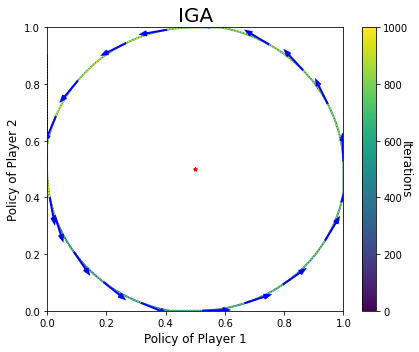

IGA Done


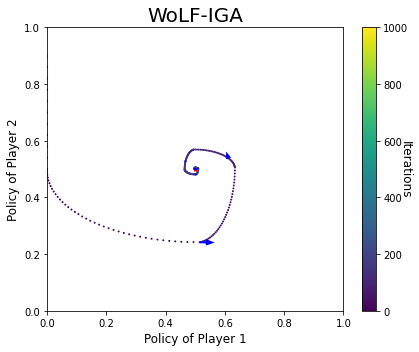

WoLF-IGA Done


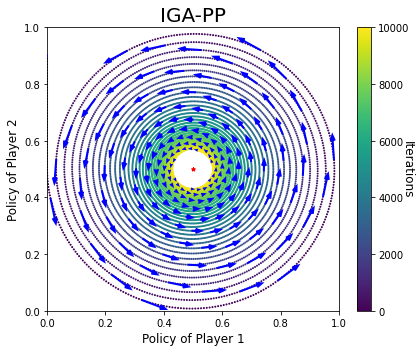

IGA-PP Done


In [ ]:
agents = ['IGA', 'WoLF-IGA', 'IGA-PP']

for agent in agents:

  if agent == 'IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA(pi_alpha,
                                     pi_beta,
                                     payoff_0,
                                     payoff_1,
                                     u_alpha,
                                     u_beta,
                                     iteration=1000, # iteration number
                                     eta=0.01 # step size
                                    )
  elif agent == 'WoLF-IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = WoLF_IGA(pi_alpha,
                                          pi_beta,
                                          payoff_0,
                                          payoff_1,
                                          u_alpha,
                                          u_beta,
                                          pi_alpha_nash=pi_alpha_nash,
                                          pi_beta_nash=pi_beta_nash,
                                          iteration=1000, # iteration number
                                          eta_min=0.01, # min step size
                                          eta_max=0.04 # max step size 
                                         )


  elif agent == 'IGA-PP':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA_PP(pi_alpha,
                                        pi_beta,
                                        payoff_0,
                                        payoff_1,
                                        u_alpha,
                                        u_beta,
                                        iteration=10000, # iteration number
                                        eta=0.01, # step size
                                        gamma=0.01 # step size for policy prediction
                                       )


  plot_dynamics(pi_alpha_history,
                pi_beta_history,
                pi_alpha_gradient_history,
                pi_beta_gradient_history,
                agent)
  print('{} Done'.format(agent))

## Part II: Stochastic Game  (15 points)

### Problem Description

In this part, you are required to implement two agent to play the Stochastic Game, which has non-monotonicity reward and requires exploration to achieve the global optimal. 

There are $3$ intermediate states before arriving at the final state. The game transition and reward matrices are:

![Stochastic Game](https://raw.githubusercontent.com/mlii/mvrl/master/data/sg.png)

Given an initial reward matrix (shown in the middle of the above plot), the choice of joint action leads to different branches. For example, the joint action pair (0, 0) will lead to the left branch, while the joint action pair (1, 1) will lead to the branch on the right. Agents can observe the current step number and branch. Zero rewards lead to the termination state (shown as the red cross).

The optimal policy is to take the top left action pair (0, 0), and finally take the bottom right action pair (1, 1), resulting in a optimal total payoff of $8$.

This game is not easy, because it needs $3$-step exploration to discover the optimal policy, and is hard to deviate from sub-optimal (the right branch). Thus, using a strategic exploration approach is necessary.


In [ ]:
import numpy as np


class StochasticGame():
    def __init__(self, episode_limit=5, good_branches=2, batch_size=None, **kwargs):
        # Define the agents
        self.n_agents = 2

        self.episode_limit = episode_limit

        # Define the internal state
        self.steps = 0

        r_matrix = [[1,1],[1,1]]
        self.payoff_values = [r_matrix for _ in range(self.episode_limit)]
        self.final_step_diff =[[1,1],[1,4]]

        self.branches = 4
        self.branch = 0

        self.n_actions = len(self.payoff_values[0])

        self.good_branches = good_branches

    def reset(self):
        """ Returns initial observations and states"""
        self.steps = 0
        self.branch = 0
        return self.get_obs()

    def step(self, actions):
        """ Returns reward, terminated, info """
        current_branch = 0
        if (actions[0], actions[1]) == (0,0):
            current_branch = 0
        if (actions[0], actions[1]) == (0,1):
            current_branch = 1
        if (actions[0], actions[1]) == (1,0):
            current_branch = 2
        if (actions[0], actions[1]) == (1,1):
            current_branch = 3

        if self.steps == 0:
            self.branch = current_branch

        info = {}

        info["good_payoff"] = 0
        info["branch"] = self.branch

        if self.good_branches == 4:
            reward = 1 if self.branch == current_branch else 0 # Need to follow your branch
        elif self.good_branches == 2:
            reward = 1 if self.branch in [0,3] and self.branch == current_branch else 0 # Initial state
        else:
            raise Exception("Environment not setup to handle {} good branches".format(self.good_branches))

        if self.episode_limit > 1 and self.steps == self.episode_limit - 1 and self.branch == 0:
            info["good_payoff"] = 1
            reward = self.final_step_diff[actions[0]][actions[1]]

        # if self.episode_limit > 1 and self.steps == self.episode_limit - 1 and self.branch == 3:
        #     info["good_payoff"] = 1
        #     reward = 1

        self.steps += 1

        if self.steps < self.episode_limit and reward > 0:
            terminated = False
        else:
            terminated = True

        info["episode_limit"] = False

        # How often the joint-actions are taken
        info["action_00"] = 0
        info["action_01"] = 0
        info["action_10"] = 0
        info["action_11"] = 0
        if (actions[0], actions[1]) == (0, 0):
            info["action_00"] = 1
        if (actions[0], actions[1]) == (0, 1):
            info["action_01"] = 1
        if (actions[0], actions[1]) == (1, 0):
            info["action_10"] = 1
        if (actions[0], actions[1]) == (1, 1):
            info["action_11"] = 1

        return self.get_obs(), [reward] * 2, [terminated] * 2, info

    def get_obs(self):
        """ Returns all agent observations in a list """
        one_hot_step = [0] * (self.episode_limit + 1 + self.branches)
        one_hot_step[self.steps] = 1
        one_hot_step[self.episode_limit + 1 + self.branch] = 1
        return [tuple(one_hot_step) for _ in range(self.n_agents)]

    def get_obs_agent(self, agent_id):
        """ Returns observation for agent_id """
        return self.get_obs()[agent_id]

    def get_obs_size(self):
        """ Returns the shape of the observation """
        return len(self.get_obs_agent(0))

    def get_state(self):
        return self.get_obs_agent(0)

    def get_state_size(self):
        """ Returns the shape of the state"""
        return self.get_obs_size()

    def get_total_actions(self):
        """ Returns the total number of actions an agent could ever take """
        return self.n_actions


### Example: Random Policy

A simple agent using random policy is provided below.

In [ ]:
from collections import defaultdict
from functools import partial
from abc import ABCMeta, abstractmethod
import random

import numpy as np

def sample(pi):
  # print(pi)
  # normalize(pi)
  return np.random.choice(pi.size, size=1, p=pi)[0]

def normalize(pi):
    minprob = np.min(pi)
    if minprob < 0.0:
        pi -= minprob
    pi /= np.sum(pi)

class BaseQAgent:
    def __init__(self, name, action_num=2, phi=0.01, gamma=0.95, episilon=0.1, **kwargs):
        self.name = name
        self.action_num = action_num
        self.episilon = episilon
        self.gamma = gamma
        self.phi = phi
        self.epoch = 0
        self.Q = None
        self.pi = defaultdict(partial(np.random.dirichlet, [1.0] * self.action_num))

    def done(self):
        pass

    def act(self, observation, exploration=False):
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)
        else:
            # if exploration == False:
            #   print(sample(self.pi[observation]))
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        pass

    @abstractmethod
    def update_policy(self, observation, action):
        pass



### TODO: Implement an agent using Q-Learning (6 points)

Q-Learning is a single agent learning algorithm for finding optimal policies in MDPs. The key updating rule is as follwings:

$$
Q(s, a) \leftarrow(1-\phi) Q(s, a)+\phi\left(r+\gamma V\left(s^{\prime}\right)\right)
$$

where,
$$
V(s)=\max\left(\left[Q(s, a)_{a \in \mathcal{A}}\right]\right)
$$

In [ ]:
class QAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('QAgent', **kwargs)
        self.Q = defaultdict(partial(np.random.rand, self.action_num))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = self.val(next_observation)
        
        if done:
            ########### TODO:Implement Q-Learning (Q updating for termination) (2 points) ###########
          Q[action] = (1 - self.phi) * Q[action] + self.phi * self.R[observation][action] 
            ########### END TODO #####################################################
        else:
            ########### TODO:Implement Q-Learning (Q updating) (2 points) ###########
          Q[action] = (1 - self.phi) * Q[action] + self.phi * (self.R[observation][action] + self.gamma * V)
            ########### END TODO #####################################################
        self.update_policy(observation, action)
        self.epoch += 1

    def val(self, observation):
        ########### TODO:Implement Q-Learning (V) (2 points) ###########
        v = np.max(self.Q[observation])
        ########### END TODO ##########################################
        return v

    def update_policy(self, observation, action):
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])
  

### Test your Q agents on the Stochastic Game

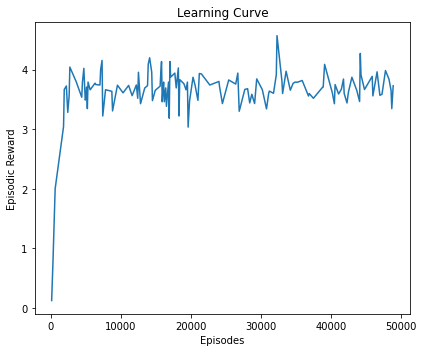

[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
Test reward is: 5.0


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

def rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=100, verbose=False):
  history_reward = []
  state_n = env.reset()
  episode_reward = 0
  episode_count = 0
  recorded_episodes = []
  recorded_episode_reward = []
  for i in range(max_iter):
      actions = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
      if exploration == False:
        print(actions)
      next_state_n, reward_n, done_n, _ = env.step(actions)
      episode_reward += np.mean(reward_n)
      for j, (state, reward, next_state, done, agent) in enumerate(zip(state_n, reward_n, next_state_n, done_n, agents)):
          agent.update(state, actions[j], reward, next_state, done)
      state_n = next_state_n
      if np.all(done_n):
          state_n = env.reset()
          history_reward.append(episode_reward)
          episode_reward = 0
          episode_count += 1
          if (i + 1) %  log_episode_interval == 0:
            recorded_episodes.append(i)
            episodes_mean_reward = np.mean(history_reward)
            recorded_episode_reward.append(episodes_mean_reward)
            history_reward = []
            if verbose:
                print('Episode {}, Reward {}'.format(i, episodes_mean_reward))
  return recorded_episodes, recorded_episode_reward


agent_num = 2
action_num = 2
agents = []
env = StochasticGame()
for i in range(agent_num):
    agent = QAgent(action_num=action_num, phi=0.01, gamma=0.99, episilon=0.1)
    agents.append(agent)

# Training
train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
                                                                 agents=agents, 
                                                                 exploration=True, 
                                                                 max_iter=50000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(train_recorded_episodes, train_recorded_episode_reward)

ax.set_title("Learning Curve")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()

# Testing
test_recorded_episodes, test_recorded_episode_reward = rollout(env=env, 
                                                               agents=agents, 
                                                               exploration=False, 
                                                               max_iter=10, 
                                                               log_episode_interval=1)
print('Test reward is:', np.mean(test_recorded_episode_reward))

### TODO: Implement an Advanced Agent to solve the Stochastic Game (9 points)

Unless you are extremely lucky, the Q-learning agent implemented above is very hard to succeed in the Stochastic Game. In this part, you are required to implement a really cool agent to play the Stochastic Game. 

**Hint: You might want to use a strategic exploration approach.**

Points will be given based on the performance of your algorithm, e.g., if the test reward of your algorithm is 6, you will be given 6/8*9=6.75 points, since the optimal payoff is 8.

In [ ]:
# You can write any code to implement your CoolAgent, please ouput
# action via the act(observation, exploration) method
class CoolAgent(BaseQAgent):
    def __init__(self, delta_w=0.0005, delta_l=0.002, **kwargs):
        super().__init__('CoolAgent', **kwargs)
        self.Q = defaultdict(partial(np.zeros, self.action_num))
        self.C = defaultdict(partial(np.zeros, 1))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))
        self.total_count_R = 0
        self.pi = defaultdict(lambda: np.array([1 / self.action_num] * self.action_num))
        self.avg_pi = defaultdict(partial(np.zeros, self.action_num))
        self.delta_w = delta_w
        self.delta_l = delta_l

    def done(self):
        pass

    def set_episilon(self, episilon_):
        self.episilon = episilon_

    def act(self, observation, exploration):
        # print(self.episilon)
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)  
        else:
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done, update_policy_ = True):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = self.val(next_observation)
        self.total_count_R += 1.0
        
        if done:
            # Q[action] = (1 - self.phi) * Q[action] + self.phi * self.R[observation][action] 
            Q[action] = (1 - self.phi) * Q[action] + self.phi * reward
        else:
            # Q[action] = (1 - self.phi) * Q[action] + self.phi * (self.R[observation][action] + self.gamma * V)
            Q[action] = (1 - self.phi) * Q[action] + self.phi * (reward + self.gamma * V)
        if update_policy_:    
          self.update_policy(observation, action)
        self.epoch += 1
    
    def val(self, observation):
        v = np.max(self.Q[observation])
        return v

    def expected_value(self, pi, Q):
        expected_value = 0
        for i in range(self.action_num):
            expected_value += pi[i] * Q[i]
        
        return expected_value

    def constrain_prob(self, observation, action):
        if self.pi[observation][action] > 1.0:
            self.pi[observation][action] = 1.0
        if self.pi[observation][action] < 0.0:
            self.pi[observation][action] = 0.0

        # self.pi[observation][1 - action] = 1.0 - self.pi[observation][action]
        if self.pi[observation][action] == 0:
            self.pi[observation][action] = 1.0 - self.pi[observation][1 - action]
        if self.pi[observation][1 - action] == 0:
            self.pi[observation][1 - action] = 1.0 - self.pi[observation][action]
        self.pi[observation] /= np.sum(self.pi[observation]) 

    @abstractmethod
    def update_policy(self, observation, action):
        # Update estimate of average policy
        self.C[observation] += 1
        # print('C(s) = ' + str(self.C[observation]))
        self.avg_pi[observation] = self.avg_pi[observation] + 1 / self.C[observation] * (self.pi[observation] - self.avg_pi[observation])
        # self.avg_pi[observation] = (self.avg_pi[observation] * (self.C[observation] - 1) + self.pi[observation]) / self.C[observation] 
        # print('avg_pi = ')
        # print(self.avg_pi[observation])

        # Update current policy and constrain it to a legal probability distribution
        # normalize(self.pi[observation])
        # print('pi = ')
        # print(self.pi[observation])
        expected_value_current = self.expected_value(self.pi[observation], self.Q[observation])
        normalize(self.avg_pi[observation])
        # print('avg_pi = ')
        # print(self.avg_pi[observation])
        expected_value_avg = self.expected_value(self.avg_pi[observation], self.Q[observation])
        # print('expected_value_current = ' + str(expected_value_current))
        # print('expected_value_avg = ' + str(expected_value_avg))
        if observation[0] == 1:
            self.delta_w = 0.0001
            self.delta_l = 0.0004
        else:
            self.delta_w = 0.1
            self.delta_l = 0.4
        if expected_value_current > expected_value_avg:
            delta_pi = self.delta_w
        else:
            delta_pi = self.delta_l
        # print('delta_pi = ' + str(delta_pi))

        if action == np.argmax(self.Q[observation]):
            self.pi[observation][action] += delta_pi
            # self.pi[observation][action] = np.min(1.0, self.pi[observation][action])
        else:
            self.pi[observation][action] += -delta_pi / (self.action_num - 1)
            # self.pi[observation][action] = np.max(0.0, self.pi[observation][action])
        normalize(self.pi[observation])
        # self.constrain_prob(observation, action)
        # print('pi = ')
        # print(self.pi[observation])


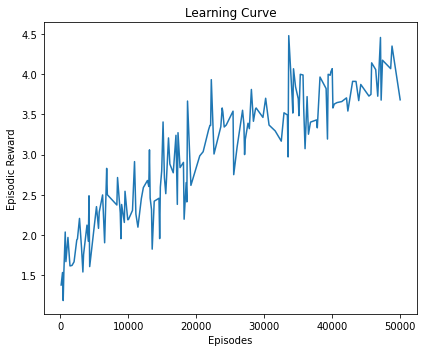

In [ ]:
# Feel Free to write code here to train and tune your cool agents, 
# and assign the trained agents to cool_agents at the end
# ########################################
# TODO: Your cool agent training code #############
def cool_rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=100, verbose=False):
  history_reward = []
  state_n = env.reset()
  episode_reward = 0
  episode_count = 0
  recorded_episodes = []
  recorded_episode_reward = []
  episode_steps = 0
  for i in range(max_iter):
      actions = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
      if exploration == False:
        print(actions)
      next_state_n, reward_n, done_n, _ = env.step(actions)
      episode_reward += np.mean(reward_n)
      episode_steps += 1
      for j, (state, reward, next_state, done, agent) in enumerate(zip(state_n, reward_n, next_state_n, done_n, agents)):
          agent.update(state, actions[j], reward, next_state, done, update_policy_ = True)
      state_n = next_state_n
      if np.all(done_n):
          episode_steps = 0
          state_n = env.reset()
          history_reward.append(episode_reward)
          episode_reward = 0
          episode_count += 1
          if (i + 1) %  log_episode_interval == 0:
            recorded_episodes.append(i)
            episodes_mean_reward = np.mean(history_reward)
            recorded_episode_reward.append(episodes_mean_reward)
            history_reward = []
            if verbose:
                print('Episode {}, Reward {}'.format(i, episodes_mean_reward))
  return recorded_episodes, recorded_episode_reward

# for j in range(10):
agent_num = 2
action_num = 2
agents = []
env = StochasticGame()
for i in range(agent_num):
    agent = CoolAgent(action_num=action_num, phi=0.01, gamma=1.0, episilon=0.2)
    agents.append(agent)

# Training
train_recorded_episodes, train_recorded_episode_reward = cool_rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=50000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(train_recorded_episodes, train_recorded_episode_reward)

ax.set_title("Learning Curve")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()


# ########################################
cool_agents = agents

In [ ]:
# Cool agent evaluation code, please do not change
cool_env = StochasticGame()
test_cool_recorded_episodes, test_cool_recorded_episode_reward = rollout(env=cool_env, 
                                                                        agents=cool_agents, 
                                                                        exploration=False, 
                                                                        max_iter=10, 
                                                                        log_episode_interval=1)
print('Cool agent\'s test reward is:', np.mean(test_cool_recorded_episode_reward))

[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
Cool agent's test reward is: 8.0


Few words to analysis the results comparing to the Q Agent, and what you have did to improve the performance. (< 300 words)

On average, there is around 50% of chance for Q Agent to converge at global optimal(a total payoff of 8) and the remaining 50% of chance to result in suboptimal(a total payoff of 5). So the average test reward is about 6.5. While for the Cool Agent it always (like 99%) converges to the global optimal and the average test reward is 8(or very close to 8). After convergence, both agents' strategies become pure or very close to pure strategies for each state of the game. 

To improve the performance, Wolf policy hill-climbing(Wolf PHC) is used to train both two cool agents. At each time step of an episode, the exploration is achieved using epsilon-greedy strategy. Following the Wolf PHC algorithm, the agent changes its policy quickly if its expected payoff of current policy is less than the average policy(winning) otherwise changes slowly(losing) using different learning rate for winning and losing. Furthermore, it is observed that initially the agent can not visit the terminal state following the left or right good branch and the collected experiences(episodes) always consists of 1, 2, 3, or occasionlly 4 steps, which doesn't enable the agent to update its Q table to reflect difference between two good branches(since the only difference between them exists in the 5th step reward matrix). Thus the learning rates(of policy) of the initial state for winning and losing are set to be much lower than the ones of all the other states to allow time for agent to learn to collect 5 steps experience and propagate the Q value change at time step 5 back to update the one of initial state before learning to choose the best branch. The direct reward received is used for the update of Q value instead of average reward used for Q Agent.






## Part III: Deep Multi-Agent Reinforcement Learning (20 points)

For this part of the coursework, you will implement your choice of any deep reinforcement learning algorithms (e.g., DQN, DRQN, or PPO) in a multi-agent setting and get to see it work on the `Switch-n` environment from ma-gym. Please read [the wiki of ma-gym](https://github.com/koulanurag/ma-gym/wiki/) first.

### Environment Example
#### Switch2-v0
![Switch-2](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch2-v0.gif)
#### Switch4-v0
![Switch-4](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch4-v0.gif)

`Switch-n` is a grid world environment having `n agents` where each agent wants to move their corresponding home location (marked in boxes outlined in same colors).
Each agent receives only it's local position coordinates. The challenging part of the game is to pass through the narrow corridor through which only one agent can pass at a time. They need to coordinate to not block the pathway for the other. A reward of +5 is given to each agent for reaching their home cell. The episode ends when both agents has reached their home state or for a maximum of 100 steps in environment.

Action Space: `0: Down, 1: Left, 2: Up , 3: Right, 4: Noop`

Agent Observation : `Agent Coordinate + Steps in env.`

Best Score: `NA`

### Download Requirements and Set the Environment
The following command will download the required scripts and set up the environment. 

In [ ]:
!rm -rf /content/ma-gym  
!git clone https://github.com/koulanurag/ma-gym.git 
%cd /content/ma-gym 
!pip install -q -e . 
!apt-get install -y xvfb python-opengl x11-utils > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install -U gym[atari] > /dev/null 2>&1

Cloning into 'ma-gym'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 792 (delta 21), reused 17 (delta 9), pack-reused 749
Receiving objects: 100% (792/792), 2.27 MiB | 7.89 MiB/s, done.
Resolving deltas: 100% (381/381), done.
/content/ma-gym
     |████████████████████████████████| 829kB 3.8MB/s 
     |████████████████████████████████| 1.6MB 15.0MB/s 
     |████████████████████████████████| 17.3MB 230kB/s 
     |████████████████████████████████| 2.1MB 47.8MB/s 
     |████████████████████████████████| 1.0MB 45.2MB/s 
     |████████████████████████████████| 25.2MB 101kB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.4 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.3.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; p

In [ ]:
%matplotlib inline
import gym
import ma_gym
from ma_gym.wrappers import Monitor
import matplotlib.pyplot as plt
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

#### Example of playing Switch2-v0 Using Random Policy

In [ ]:
env = wrap_env(gym.make("Switch4-v0")) # Use "Switch4-v0" for the Switch-4 game
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0
ep_step = 0

obs_n = env.reset()
while not all(done_n):
    obs_n, reward_n, done_n, info = env.step(env.action_space.sample())
    ep_step += 1
    # obs_n, reward_n, done_n, info = env.step([2, 2])
    # print(np.array(obs_n[0]).shape)
    # print(obs_n[0])
    print(reward_n)
    # print(env.action_space[0].contains(0))
    ep_reward += sum(reward_n)
    env.render()
print(ep_step)
env.close()
# To improve the training efficiency, render() is not necessary during the training.
# We provide the render and video code here just want to demonstrate how to debugging and analysis.
show_video()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[0.0, 0.17]
[0.5, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.5, 0.17]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.5]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.17]
[0.0, 0.17]
[0.5, 0.17]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.33]
[0.5, 0.17]
[0.5, 0.0]
[0.5, 0.0]
[0.5, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.0, 0.17]
[0.5, 0.17]
[0.5, 0.0]
[0.5, 0.0]
[0.5, 0.0]
[1.0, 0.0]
[1.0, 0.0]
[1.0, 0.0]
[0.5, 0.0]
[1.0, 0.0]
[1.0, 0.17]
[1.0, 0.17]
[1.0, 0.17]
[1.0, 0.17]
[1.0, 0.17]
[1.0, 0.17]
50


### TODO: Implement a Deep MARL Agent to Play Switch2-v0 (15 points)
Implement your own choice of any deep MARL algorithms to play the Switch2-v0 game.

**Requirements**

*   Implement your own algorithms, rather than a simple `import` from any other existing algorithm frameworks.
* TensorFlow 2.0+ or PyTorch 1.4+ are recommended.
*   Your algorithm has to be Multi-Agent, i.e., policy input should be the observation/ state for each corresponding agent, not for all agents.

**Required contents**

*   All your codes
*   Learning Curve (reward with respect to training iterations/ episodes)
*   Description of your code and performance analysis (no more than 500 words)



#### Code for Playing Switch2-v0


In [ ]:
import tensorflow as tf      
# import keras
import numpy as np           
import random                
import time                  
from collections import deque
import matplotlib.pyplot as plt 

### MODEL HYPERPARAMETERS
state_size = [101]      # Our input is a stack of 50 coordinates and step number in an episode hence 2x50+1=101 (flattened vector size) 
action_size = 5              # Number of possible actions
learning_rate =  0.0001      # Learning rate for Q-Network

### TRAINING HYPERPARAMETERS
total_episodes = 3000         # Total episodes for training
batch_size = 64               # Number of experiences to update primary Q-Network in each training step 

# TARGET Q-NETWORK HYPERPARAMETERS 
max_tau = 100 # Number of steps where we periodically update our target network

# EXPLORATION HYPERPARAMETERS for epsilon greedy strategy
explore_start = 1.0            # Initial exploration probability 
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.00005            # exponential decay rate for exploration probability
decay_step = 0

# Q LEARNING hyperparameters
gamma = 0.95               # Discounting rate

### EXPERIENCE REPLAY BUFFER(MEMORY) HYPERPARAMETERS
pretrain_length = 10000   # Number of experiences stored in the Memory when initialized for the first time
memory_size = 10000       # Number of experiences the Memory can keep

### MODIFY THIS TO FALSE IF YOU JUST WANT TO SEE THE TRAINED AGENT
training = True

possible_actions = np.identity(5,dtype=int).tolist() # One-hot encoding of possible actions
actions = np.arange(5) # All possible actions
# print(actions)
# print(possible_actions)

In [ ]:
stack_size = 50 # We stack 50 states (each state is the local coordinate at its time step)

def stack_states(stacked_states, state, stack_size, is_new_episode):
    if is_new_episode:
        # Clear our stacked_states
        stacked_states = deque([np.zeros((2), dtype=np.float32) for i in range(stack_size)], maxlen = stack_size)
        
        # Because we're in a new episode, copy the same state (coordinate) maximum number of steps in an episode times
        for i in range(stack_size):
            stacked_states.append(state)
        
        # Stack the states
        stacked_state = np.hstack(np.stack(stacked_states, axis=0))

    else:
        # Append state to deque, automatically removes the oldest state
        stacked_states.append(state)

        # Build the stacked state
        stacked_state = np.hstack(np.stack(stacked_states, axis=0)) 
    
    return stacked_state, stacked_states

In [ ]:
class DDDQNNet:
    def __init__(self, state_size, action_size, learning_rate, name):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.name = name
        
        
        # tf.variable_scope specifies which network (primary or target Q-Network) for which agent we're using 
        # it is useful for updating w- parameters (by copying the primary Q-Network parameters)
        with tf.variable_scope(self.name):
            
            self.inputs_ = tf.placeholder(tf.float32, [None, *state_size], name="inputs")
            
            #
            self.ISWeights_ = tf.placeholder(tf.float32, [None,1], name='IS_weights')
            
            self.actions_ = tf.placeholder(tf.float32, [None, action_size], name="actions_")
            
            # target_Q = R(s,a) + ymax Qhat(s', a')
            self.target_Q = tf.placeholder(tf.float32, [None], name="target")
    
            
            self.flatten = tf.layers.flatten(self.inputs_)
            
            
            ## Here we separate into two streams
            # The one that calculates V(s)
            self.value_fc = tf.layers.dense(inputs = self.flatten,
                                  units = 128,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="value_fc")
            
            self.value = tf.layers.dense(inputs = self.value_fc,
                                        units = 1,
                                        activation = None,
                                        kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="value")
            
            # The one that calculates A(s,a)
            self.advantage_fc = tf.layers.dense(inputs = self.flatten,
                                  units = 128,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="advantage_fc")
            
            self.advantage = tf.layers.dense(inputs = self.advantage_fc,
                                        units = self.action_size,
                                        activation = None,
                                        kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="advantages")
            
            # Agregating layer
            # Q(s,a) = V(s) + (A(s,a) - 1/|A| * sum A(s,a'))
            self.output = self.value + tf.subtract(self.advantage, tf.reduce_mean(self.advantage, axis=1, keepdims=True))
              
            # Q is the predicted Q value.
            self.Q = tf.reduce_sum(tf.multiply(self.output, self.actions_), axis=1)
            
            self.td_error = tf.square(self.target_Q - self.Q)
            self.loss = tf.reduce_mean(self.td_error)
            self.trainer = tf.train.AdamOptimizer(learning_rate = self.learning_rate)
            self.updateModel = self.trainer.minimize(self.loss)

In [ ]:
# Initialize the environment
env = wrap_env(gym.make("Switch2-v0")) 
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0

# Reset the graph
tf.reset_default_graph()

# Instantiate the primary and the target Q-network for each agent 
DQNetworks = []
TargetNetworks = []
for i in range(env.n_agents):
    DQNetworks.append(DDDQNNet(state_size, action_size, learning_rate, name = "DQNetwork" + str(i)))
    TargetNetworks.append(DDDQNNet(state_size, action_size, learning_rate, name = "TargetNetwork" + str(i)))
# print(len(DQNetworks))
# print(len(TargetNetworks))

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


AttributeError: ignored

In [ ]:
def predict_action(explore_start, explore_stop, decay_rate, decay_step, state, possible_actions, DQNetwork, training = True):
    ## EPSILON GREEDY STRATEGY
    # Choose action a from state s using epsilon greedy.
    ## First we randomize a number
    exp_exp_tradeoff = np.random.rand()

    if training:
        # Exploration probability is exponentially decaying
        explore_probability = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * decay_step)
    else:
        explore_probability = 0.01 # Only change this to 0 when used for testing part
    
    if (explore_probability > exp_exp_tradeoff):
        # Make a random action (exploration)
        action = random.choice(possible_actions)
        
    else:
        # Get action from Q-network (exploitation)
        # Estimate the Qs values state
        Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: np.reshape(state, [1, 101])})
        
        # Choose the action with biggest Q value
        choice = np.argmax(Qs)
        action = possible_actions[int(choice)]
                
    return action, explore_probability

In [ ]:
class Memory():
    def __init__(self, max_size):
        self.buffer = deque(maxlen = max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        buffer_size = len(self.buffer)
        index = np.random.choice(np.arange(buffer_size),
                                size = batch_size,
                                replace = False)
        
        return [self.buffer[i] for i in index]

In [ ]:
# Instantiate memory
memories = [Memory(max_size = memory_size) for _ in range(env.n_agents)]
# print(memories)

# Initialize stacked states for each agent
stacked_states = []
for i in range(env.n_agents):
    stacked_states.append(deque([np.zeros((2), dtype=np.float32) for j in range(stack_size)], maxlen = stack_size)) 

obs_n = env.reset()

def pretrain(obs_n, stacked_states, env, memories, possible_actions, is_random, DQNetworks, explore_start, explore_stop, decay_rate, decay_step, actions): 
    for i in range(pretrain_length):
        # If it's the first step
        if i == 0:
            episode_step_num = 1 # Within 1~50
            for j in range(env.n_agents):
                obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
                obs_n[j] = np.hstack((obs_n[j], episode_step_num))

        # Joint action of agents
        action_n = env.action_space.sample()
        rs = is_random.split()
        random_count = 0
        for j, each in enumerate(rs):
            if rs == '0':
                action_n[j], _ = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j], training = False)
            else:
                random_count += 1
                if random_count > 1:
                    action_n[j] = 4       
        
        next_obs_n, reward_n, done_n, info = env.step(action_n)
        episode_step_num += 1
        for j in range(env.n_agents):
            next_obs_n[j], stacked_states[j] = stack_states(stacked_states[j], next_obs_n[j], stack_size, False)
            next_obs_n[j] = np.hstack((next_obs_n[j], episode_step_num))
        # env.render()
        
        # If episode is finished
        if all(done_n):
            # Add experience to memory
            for j in range(env.n_agents):
                memories[j].add((obs_n[j], possible_actions[action_n[j]], reward_n[j], next_obs_n[j], done_n[j]))
            
            # Start a new episode
            obs_n = env.reset()
            episode_step_num = 1
            for j in range(env.n_agents):
                obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
                obs_n[j] = np.hstack((obs_n[j], episode_step_num))
            
        else:
            # Add experience to memory
            for j in range(env.n_agents):
                memories[j].add((obs_n[j], possible_actions[action_n[j]], reward_n[j], next_obs_n[j], done_n[j]))
            
            obs_n = next_obs_n

is_random = "1 1"
pretrain(obs_n, stacked_states, env, memories, possible_actions, is_random, DQNetworks, explore_start, explore_stop, decay_rate, decay_step, actions)

In [ ]:
def update_target_graph(from_name, to_name):
    # Get the parameters of primary Q-Network
    from_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, from_name)
    
    # Get the parameters of target Q-Network
    to_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, to_name)

    op_holder = []
    
    # Update target Q-network parameters with primary Q-Network
    for from_var,to_var in zip(from_vars,to_vars):
        op_holder.append(to_var.assign(from_var))
    return op_holder

In [ ]:
# Saver to save our model
saver = tf.train.Saver()

### TRAINING PART 
if training == True:
    with tf.Session() as sess:
      with tf.device("/cpu:0"):
        # Initialize the variables
        sess.run(tf.global_variables_initializer())
        
        # Initialize the decay step used for reducing epsilon
        decay_step = 0

        tau = 0

        loss_n = []
        agent_to_update = 1
        total_rewards = []

        # Init the game
        env.close()
        env = wrap_env(gym.make("Switch2-v0")) 
        done_n = [False for _ in range(env.n_agents)]
        
        # Update the parameters of target Q-Network with primary Q-Network
        for i in range(env.n_agents):
            update_target = update_target_graph("DQNetwork" + str(i), "TargetNetwork" + str(i))
            sess.run(update_target)
        
        for episode in range(total_episodes):
            if episode % 1000 == 0 and episode < 2000 and episode != 0:
                agent_to_update = 1 - agent_to_update
                decay_step = 0
                decay_rate = 0.00005 * 0.7
                if episode == 1000:
                    print('renew memories')
                    env.close()
                    env = wrap_env(gym.make("Switch2-v0")) 
                    obs_n = env.reset()
                    stacked_states = []
                    for i in range(env.n_agents):
                        stacked_states.append(deque([np.zeros((2), dtype=np.float32) for j in range(stack_size)], maxlen = stack_size))
                    is_random = "0 1"
                    pretrain(obs_n, stacked_states, env, memories, possible_actions, is_random, DQNetworks, explore_start, explore_stop, decay_rate, decay_step, actions)
                    env.close()
                    env = wrap_env(gym.make("Switch2-v0")) 
                    done_n = [False for _ in range(env.n_agents)]

            # Set step of the episode to 1
            episode_step_num = 1
            
            # Initialize the rewards of the episode
            episode_rewards = []
            
            # Make a new episode and observe the first state
            obs_n = env.reset() 
            done_n = [False for _ in range(env.n_agents)]
            
            for j in range(env.n_agents):
                obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
                obs_n[j] = np.hstack((obs_n[j], episode_step_num))

            while not all(done_n):
                episode_step_num += 1
                
                # Increase the step for updating target Q-Network
                tau += 1
                
                # Increase decay_step
                decay_step +=1
                
                # With ϵ select a random action, otherwise select a = argmaxQ(st,a)
                action_n = np.zeros(env.n_agents)
                explore_probability_n = np.zeros(env.n_agents)
                for j in range(env.n_agents):
                    if j == agent_to_update:
                        action_n[j], explore_probability_n[j] = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j])
                    else:
                        if episode >= 1000:
                            action_n[j], explore_probability_n[j] = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j], training = False)
                        else:
                            # action_n[j] = env.action_space.sample()[j]
                            action_n[j] = 4
                            explore_probability_n[j] = 0.01

                next_obs_n, reward_n, done_n, info = env.step(action_n)
                for j in range(env.n_agents):
                    next_obs_n[j], stacked_states[j] = stack_states(stacked_states[j], next_obs_n[j], stack_size, False)
                    next_obs_n[j] = np.hstack((next_obs_n[j], episode_step_num))
                # env.render()
                
                # Add the reward to total reward
                episode_rewards.append(np.sum(reward_n))

                # If the game is finished
                if all(done_n):
                    # Get the total reward of the episode
                    total_reward = np.sum(episode_rewards)
                    # if (episode + 1) %  log_episode_interval == 0:
                    total_rewards.append(total_reward)

                    for j in range(env.n_agents):
                        print('Episode: {}'.format(episode),
                                  'Total reward: {}'.format(total_reward),
                                  'Training loss: {:.4f}'.format(loss_n[j]),
                                  'Explore P: {:.4f}'.format(explore_probability_n[j]))
                    loss_n = []

                    # Add experience to memory
                    for j in range(env.n_agents):
                        memories[j].add((obs_n[j], possible_actions[int(action_n[j])], reward_n[j], next_obs_n[j], done_n[j]))

                else:               
                    # Add experience to memory
                    for j in range(env.n_agents):
                        # print(action_n)
                        memories[j].add((obs_n[j], possible_actions[int(action_n[j])], reward_n[j], next_obs_n[j], done_n[j]))
                    
                    obs_n = next_obs_n


                ### LEARNING PART            
                for j in range(env.n_agents):
                  if j != agent_to_update:
                      continue
                  # Obtain random mini-batch from memory
                  batch = memories[j].sample(batch_size)
                  # print(batch)
                  
                  states_mb = np.array([each[0] for each in batch])
                  actions_mb = np.array([each[1] for each in batch])
                  rewards_mb = np.array([each[2] for each in batch]) 
                  next_states_mb = np.array([each[3] for each in batch])
                  dones_mb = np.array([each[4] for each in batch])
                  # print(actions_mb.shape)

                  target_Qs_batch = []

                  
                  ### DOUBLE DQN Logic
                  # Use primary Q-Network (DQNetworks[j]) to select the action to take at next_state (a') (action with the highest Q-value)
                  # Use target Q-Network (TargetNetworks[j]) to calculate the Q_val of Q(s',a')
                  
                  # Get Q values for next_state 
                  q_next_state = sess.run(DQNetworks[j].output, feed_dict = {DQNetworks[j].inputs_: next_states_mb})
                  
                  # Calculate Qtarget for all actions that state
                  q_target_next_state = sess.run(TargetNetworks[j].output, feed_dict = {TargetNetworks[j].inputs_: next_states_mb})
                  
                  
                  # Set Q_target = r if the episode ends at s+1, otherwise set Q_target = r + gamma * Qtarget(s',a') 
                  for i in range(0, len(batch)):
                      terminal = dones_mb[i]
                      
                      # We got a'
                      action = np.argmax(q_next_state[i])

                      # If we are in a terminal state, only equals reward
                      if terminal:
                          target_Qs_batch.append(rewards_mb[i])
                          
                      else:
                          # Take the Qtarget for action a'
                          target = rewards_mb[i] + gamma * q_target_next_state[i][action]
                          target_Qs_batch.append(target)
                          

                  targets_mb = np.array([each for each in target_Qs_batch])
                  # print(targets_mb.shape)

                  
                  _, loss = sess.run([DQNetworks[j].updateModel, DQNetworks[j].loss],
                                      feed_dict={DQNetworks[j].inputs_: states_mb,
                                                DQNetworks[j].target_Q: targets_mb,
                                                DQNetworks[j].actions_: actions_mb})
                  # print("DQNetwork updated")
                  loss_n.append(loss)
                  
                  if tau > max_tau:
                      # Update the parameters of target Q-Network using primary Q-Network
                      update_target = update_target_graph("DQNetwork" + str(j), "TargetNetwork" + str(j))
                      sess.run(update_target)
                      tau = 0
                      print("TargetNetwork updated")

            # Save model every 5 episodes
            if episode % 5 == 0:
                save_path = saver.save(sess, "./model.ckpt")
                print("Model Saved")

        np.savetxt("switch2.csv", total_rewards, delimiter=",")


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Episode: 0 Total reward: -9.999999999999998 Training loss: 106.7213 Explore P: 0.0100
Episode: 0 Total reward: -9.999999999999998 Training loss: 124.8101 Explore P: 0.9975
Model Saved
Episode: 1 Total reward: -4.9 Training loss: 24.6484 Explore P: 0.0100
Episode: 1 Total reward: -4.9 Training loss: 23.4553 Explore P: 0.9951
TargetNetwork updated
Episode: 2 Total reward: -9.999999999999998 Training loss: 10.1222 Explore P: 0.0100
Episode: 2 Total reward: -9.999999999999998 Training loss: 8.0903 Explore P: 0.9926
Episode: 3 Total reward: -9.999999999999998 Training loss: 12.2734 Explore P: 0.0100
Episode: 3 Total reward: -9.999999999999998 Training loss: 8.7935 Explore P: 0.9901
TargetNetwork updated
Episode: 4 Total reward: -9.999999999999998 Training loss: 11.1534 Explore P: 0.0100
Episode: 4 Total reward: -9.999999999999998 Training loss: 6.9063 Explore P: 0.9877
Episode: 5 Total reward: -9.999999999999998 Training loss: 8.2092 Explore P: 0.0100
Episode: 5 Total reward: -9.99999999999

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Episode: 1000 Total reward: -4.9 Training loss: 0.0101 Explore P: 0.9983
Episode: 1000 Total reward: -4.9 Training loss: 30.7768 Explore P: 0.0100
Model Saved
TargetNetwork updated
Episode: 1001 Total reward: -4.9 Training loss: 8.3141 Explore P: 0.9965
Episode: 1001 Total reward: -4.9 Training loss: 7.7548 Explore P: 0.0100
Episode: 1002 Total reward: -4.9 Training loss: 4.1310 Explore P: 0.9948
Episode: 1002 Total reward: -4.9 Training loss: 2.8125 Explore P: 0.0100
TargetNetwork updated
Episode: 1003 Total reward: -4.9 Training loss: 8.7452 Explore P: 0.9931
Episode: 1003 Total reward: -4.9 Training loss: 3.6419 Explore P: 0.0100
Episode: 1004 Total reward: -4.9 Training loss: 0.2258 Explore P: 0.9914
Episode: 1004 Total reward: -4.9 Training loss: 1.1800 Explore P: 0.0100
TargetNetwork updated
Episode: 1005 Total reward: -4.9 Training loss: 4.1822 Explore P: 0.9897
Episode: 1005 Total reward: -4.9 Training loss: 4.6579 Explore P: 0.0100
Model Saved
Episode: 1006 Total reward: -4.9 

In [ ]:
### TESTING PART
# Note: Please change epsilon (in function predict_action()) to 0 for testing
# Otherwise the result might change occasionally due to very small amount of randomness
with tf.Session() as sess:
    # Load the model
    # saver = tf.train.import_meta_graph('model.ckpt.meta')
    saver.restore(sess, "./model.ckpt")
    # Init the game
    env.close()
    env = wrap_env(gym.make("Switch2-v0")) 
    done_n = [False for _ in range(env.n_agents)]
    obs_n = env.reset()
    episode_step_num = 1
    print(obs_n)
    for j in range(env.n_agents):
        obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
        obs_n[j] = np.hstack((obs_n[j], episode_step_num))
    ep_reward = 0

    while not all(done_n):
        action_n = np.zeros(env.n_agents)
        explore_probability_n = np.zeros(env.n_agents)
        for j in range(env.n_agents):
            action_n[j], _ = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j], training = False)

        next_obs_n, reward_n, done_n, info = env.step(action_n)
        episode_step_num += 1
        print(next_obs_n)
        for j in range(env.n_agents):
            next_obs_n[j], stacked_states[j] = stack_states(stacked_states[j], next_obs_n[j], stack_size, False)
            next_obs_n[j] = np.hstack((next_obs_n[j], episode_step_num))
        ep_reward += sum(reward_n)
        env.render()
    
        if all(done_n):
            break  
            
        else:
            obs_n = next_obs_n

    env.close()
    show_video()  
    print("Score: ", ep_reward)

INFO:tensorflow:Restoring parameters from ./model.ckpt


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[[0.0, 0.17], [0.0, 0.83]]
[[0.0, 0.0], [0.5, 0.83]]
[[0.0, 0.17], [0.5, 0.67]]
[[0.0, 0.17], [0.5, 0.5]]
[[0.0, 0.17], [0.5, 0.33]]
[[0.0, 0.17], [0.5, 0.17]]
[[0.0, 0.17], [0.5, 0.0]]
[[0.0, 0.17], [0.0, 0.0]]
[[0.5, 0.17], [0.0, 0.0]]
[[0.5, 0.33], [0.0, 0.0]]
[[0.5, 0.5], [0.0, 0.0]]
[[0.5, 0.67], [0.0, 0.0]]
[[0.5, 0.83], [0.0, 0.0]]
[[0.0, 0.83], [0.0, 0.0]]
[[0.0, 1.0], [0.0, 0.0]]


Score:  7.3999999999999995


#### Plot the Learning Curve

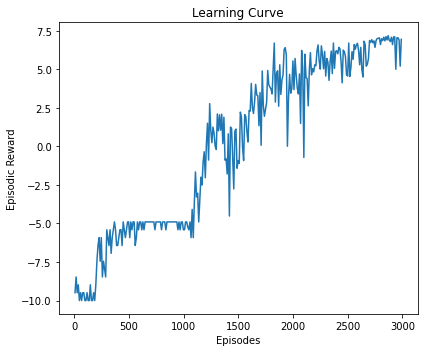

In [ ]:
import pandas as pd

total_rewards = pd.read_csv("switch2.csv", sep=',', header=None).to_numpy()
log_episode_interval = 10
episodes = np.arange(log_episode_interval - 1, total_episodes - 1, log_episode_interval)
# print(episodes)
episode_rewards = [np.mean(total_rewards[episode - log_episode_interval + 1: episode + 1]) for episode in episodes]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(episodes, episode_rewards)

ax.set_title("Learning Curve")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()

#### Analysis on performance

For this game, both agents are trained using deep Q-Network.As each agent can only observe its own coordinate without knowing others, observations from each time step of an episode are stacked together as the state of the agent to handle the problem of temporal limitation. Initially, the coordinate of the agent is copied the maximum number of steps in an eposide times and for every next state the oldest coordinate is removed and the new one is stacked. To incoporate stage information of each episode for cooperation of agents, the step number of the episode is stacked with those coordinates. Each agent has two Q-Networks. One is primary network updated at every time step and the other one is target network whose parameters are fixed for every constant number of steps and then copied from the primary network to have more stable learning. To compute TD error and handle the problem of overestimation of Q-values, the action is the argmax of the predicted Q values from the primary network and the target network is used to estimate the target Q-value with the chosen action. Within each Q-Network, the Q-value (Q(s,a)) is decomposed into the value of being at that state (V(s)) and the advantage of taking that action at that state (A(s,a)) using two streams (i.e., Q(s,a) = V(s) + A(s,a)). Each of these streams consists of a hidden layer and an output layer. Doing this is useful since for states where there will be nearly same effect on future cumulative rewards by taking different actions.

Furthermore, an experience replay (memory) is implemented for each agent to make more efficient use of observed experience. An experience consists of current state, action, next state and reward. Initially the memory is empty hence it is populated by experiences having agents take actions. During training, new experience collected using eponentially decaying epsilon will be added and a small batch of experiences are randomly sampled and used to update primary Q-Network's parameters. Doing this can avoid agents forgetting previous experiences and reduce correlation between experiences in an episode. 

Since each agent updates its Q-values and policy itself simultaneously conditioning only on its own observation, the environment becomes nonstationary from the point of each agent which makes their Q-values and policy diverge. To handle this, each agent is trained by fixing others' policy to stablize the environment so that convergence can be achieved. Every time before training an agent the memory is renewed and epsilon is reset to 1.0. For first agent's memory, experiences are collected having first agent play randomly and the second keep nooping while for the second's memory we have first agent play with its fixed updated policy and the second act randomly.  

For the performance, the episodic reward gradually increases to around 7. Overall the learning process is relatively stable and oscillation at late stage is mainly due to environment complexity. The trained agents result in a total reward closed to the optimal (please test this method more than once).

### TODO: Implement a Deep MARL Agent to Play Switch4-v0 (5 points)
Implement your own choice of any deep MARL algorithms to play the Switch4-v0 game.

**Requirements**

Same reuqiremnts as Switch2-v0 game. You can put emphasis on what differences between Switch2-v0 and Switch4-v0 and what improvements you have done.



#### Code for Playing Switch4-v0


In [ ]:
import tensorflow as tf      
import numpy as np           
import random                
import time                  
from collections import deque
import matplotlib.pyplot as plt 

### MODEL HYPERPARAMETERS
state_size = [101]      # Our input is a stack of 50 coordinates and step number in an episode hence 2x50+1=101 (flattened vector size) 
action_size = 5              # Number of possible actions
learning_rate =  0.0001      # Learning rate for Q-Network

### TRAINING HYPERPARAMETERS
total_episodes = 9000         # Total episodes for training
batch_size = 64               # Number of experiences to update primary Q-Network in each training step 

# TARGET Q-NETWORK HYPERPARAMETERS 
max_tau = 100 # Number of steps where we periodically update our target network

# EXPLORATION HYPERPARAMETERS for epsilon greedy strategy
explore_start = 1.0            # Initial exploration probability 
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.00005            # exponential decay rate for exploration probability
decay_step = 0

# Q LEARNING hyperparameters
gamma = 0.95               # Discounting rate

### EXPERIENCE REPLAY BUFFER(MEMORY) HYPERPARAMETERS
pretrain_length = 10000   # Number of experiences stored in the Memory when initialized for the first time
memory_size = 10000       # Number of experiences the Memory can keep

### MODIFY THIS TO FALSE IF YOU JUST WANT TO SEE THE TRAINED AGENT
training = True

possible_actions = np.identity(5,dtype=int).tolist() # One-hot encoding of possible actions
actions = np.arange(5) # All possible actions
# print(actions)
# print(possible_actions)

In [ ]:
stack_size = 50 # We stack 50 states (each state is the local coordinate at its time step)

def stack_states(stacked_states, state, stack_size, is_new_episode):
    if is_new_episode:
        # Clear our stacked_states
        stacked_states = deque([np.zeros((2), dtype=np.float32) for i in range(stack_size)], maxlen = stack_size)
        
        # Because we're in a new episode, copy the same state (coordinate) maximum number of steps in an episode times
        for i in range(stack_size):
            stacked_states.append(state)
        
        # Stack the states
        stacked_state = np.hstack(np.stack(stacked_states, axis=0))

    else:
        # Append state to deque, automatically removes the oldest state
        stacked_states.append(state)

        # Build the stacked state
        stacked_state = np.hstack(np.stack(stacked_states, axis=0)) 
    
    return stacked_state, stacked_states

In [ ]:
class DDDQNNet:
    def __init__(self, state_size, action_size, learning_rate, name):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.name = name
        
        
        # tf.variable_scope specifies which network (primary or target Q-Network) for which agent we're using 
        # it is useful for updating w- parameters (by copying the primary Q-Network parameters)
        with tf.variable_scope(self.name):
            
            self.inputs_ = tf.placeholder(tf.float32, [None, *state_size], name="inputs")
            
            #
            self.ISWeights_ = tf.placeholder(tf.float32, [None,1], name='IS_weights')
            
            self.actions_ = tf.placeholder(tf.float32, [None, action_size], name="actions_")
            
            # target_Q = R(s,a) + ymax Qhat(s', a')
            self.target_Q = tf.placeholder(tf.float32, [None], name="target")
    
            
            self.flatten = tf.layers.flatten(self.inputs_)
            
            
            ## Here we separate into two streams
            # The one that calculates V(s)
            self.value_fc = tf.layers.dense(inputs = self.flatten,
                                  units = 128,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="value_fc")
            
            self.value = tf.layers.dense(inputs = self.value_fc,
                                        units = 1,
                                        activation = None,
                                        kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="value")
            
            # The one that calculates A(s,a)
            self.advantage_fc = tf.layers.dense(inputs = self.flatten,
                                  units = 128,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="advantage_fc")
            
            self.advantage = tf.layers.dense(inputs = self.advantage_fc,
                                        units = self.action_size,
                                        activation = None,
                                        kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="advantages")
            
            # Agregating layer
            # Q(s,a) = V(s) + (A(s,a) - 1/|A| * sum A(s,a'))
            self.output = self.value + tf.subtract(self.advantage, tf.reduce_mean(self.advantage, axis=1, keepdims=True))
              
            # Q is the predicted Q value.
            self.Q = tf.reduce_sum(tf.multiply(self.output, self.actions_), axis=1)
            
            self.td_error = tf.square(self.target_Q - self.Q)
            self.loss = tf.reduce_mean(self.td_error)
            self.trainer = tf.train.AdamOptimizer(learning_rate = self.learning_rate)
            self.updateModel = self.trainer.minimize(self.loss)

In [ ]:
# Initialize the environment
env = wrap_env(gym.make("Switch4-v0")) 
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0

# Reset the graph
tf.reset_default_graph()

# Instantiate the primary and the target Q-network for each agent 
DQNetworks = []
TargetNetworks = []
for i in range(env.n_agents):
    DQNetworks.append(DDDQNNet(state_size, action_size, learning_rate, name = "DQNetwork" + str(i)))
    TargetNetworks.append(DDDQNNet(state_size, action_size, learning_rate, name = "TargetNetwork" + str(i)))
# print(len(DQNetworks))
# print(len(TargetNetworks))

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Use keras.layers.Dense instead.


In [ ]:
def predict_action(explore_start, explore_stop, decay_rate, decay_step, state, possible_actions, DQNetwork, training = True):
    ## EPSILON GREEDY STRATEGY
    # Choose action a from state s using epsilon greedy.
    ## First we randomize a number
    exp_exp_tradeoff = np.random.rand()

    if training:
        # Exploration probability is exponentially decaying
        explore_probability = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * decay_step)
    else:
        explore_probability = 0.01 # Only change this to 0 when used for testing part
    
    if (explore_probability > exp_exp_tradeoff):
        # Make a random action (exploration)
        action = random.choice(possible_actions)
        
    else:
        # Get action from Q-network (exploitation)
        # Estimate the Qs values state
        Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: np.reshape(state, [1, 101])})
        
        # Choose the action with biggest Q value
        choice = np.argmax(Qs)
        action = possible_actions[int(choice)]
                
    return action, explore_probability

In [ ]:
class Memory():
    def __init__(self, max_size):
        self.buffer = deque(maxlen = max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        buffer_size = len(self.buffer)
        index = np.random.choice(np.arange(buffer_size),
                                size = batch_size,
                                replace = False)
        
        return [self.buffer[i] for i in index]

In [ ]:
# Instantiate memory
memories = [Memory(max_size = memory_size) for _ in range(env.n_agents)]
# print(memories)

# Initialize stacked states for each agent
stacked_states = []
for i in range(env.n_agents):
    stacked_states.append(deque([np.zeros((2), dtype=np.float32) for j in range(stack_size)], maxlen = stack_size)) 

obs_n = env.reset()

def pretrain(obs_n, stacked_states, env, memories, possible_actions, is_random, DQNetworks, explore_start, explore_stop, decay_rate, decay_step, actions): 
    for i in range(pretrain_length):
        # If it's the first step
        if i == 0:
            episode_step_num = 1 # Within 1~50
            for j in range(env.n_agents):
                obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
                obs_n[j] = np.hstack((obs_n[j], episode_step_num))

        # Joint action of agents
        action_n = env.action_space.sample()
        rs = is_random.split()
        random_count = 0
        for j, each in enumerate(rs):
            if rs == '0':
                action_n[j], _ = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j], training = False)    
            else:
                random_count += 1
                if random_count > 1:
                    action_n[j] = 4

        next_obs_n, reward_n, done_n, info = env.step(action_n)
        episode_step_num += 1
        for j in range(env.n_agents):
            next_obs_n[j], stacked_states[j] = stack_states(stacked_states[j], next_obs_n[j], stack_size, False)
            next_obs_n[j] = np.hstack((next_obs_n[j], episode_step_num))
        # env.render()
        
        # If episode is finished
        if all(done_n):
            # Add experience to memory
            for j in range(env.n_agents):
                memories[j].add((obs_n[j], possible_actions[action_n[j]], reward_n[j], next_obs_n[j], done_n[j]))
            
            # Start a new episode
            obs_n = env.reset()
            episode_step_num = 1
            for j in range(env.n_agents):
                obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
                obs_n[j] = np.hstack((obs_n[j], episode_step_num))
            
        else:
            # Add experience to memory
            for j in range(env.n_agents):
                memories[j].add((obs_n[j], possible_actions[action_n[j]], reward_n[j], next_obs_n[j], done_n[j]))
            
            obs_n = next_obs_n

is_random = ["1 1 1 1", "0 1 1 1", "0 0 1 1", "0 0 0 1"]
pretrain(obs_n, stacked_states, env, memories, possible_actions, is_random[0], DQNetworks, explore_start, explore_stop, decay_rate, decay_step, actions)

In [ ]:
def update_target_graph(from_name, to_name):
    # Get the parameters of primary Q-Network
    from_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, from_name)
    
    # Get the parameters of target Q-Network
    to_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, to_name)

    op_holder = []
    
    # Update target Q-network parameters with primary Q-Network
    for from_var,to_var in zip(from_vars,to_vars):
        op_holder.append(to_var.assign(from_var))
    return op_holder

In [ ]:
# Saver to save our model
saver = tf.train.Saver()

### TRAINING PART
if training == True:
    with tf.Session() as sess:
      with tf.device("/cpu:0"):
        # Initialize the variables
        sess.run(tf.global_variables_initializer())
        
        # Initialize the decay rate (that will use to reduce epsilon) 
        decay_step = 0
        
        tau = 0

        loss_n = []
        agent_to_update = 0
        r_idx = 0
        total_rewards = []

        # Init the game
        env.close()
        env = wrap_env(gym.make("Switch4-v0")) 
        done_n = [False for _ in range(env.n_agents)]
        
        # Update the parameters of target Q-Network with primary Q-Network
        for i in range(env.n_agents):
            update_target = update_target_graph("DQNetwork" + str(i), "TargetNetwork" + str(i))
            sess.run(update_target)
        
        for episode in range(total_episodes):
            if episode == 1000 or (episode - 1000) % 2000 == 0 and episode != 0 and episode < 7000:
                agent_to_update += 1 
                decay_step = 0
                decay_rate = 0.00005 * 0.7
                print('renew memories')
                env.close()
                env = wrap_env(gym.make("Switch4-v0")) 
                obs_n = env.reset()
                stacked_states = []
                for i in range(env.n_agents):
                    stacked_states.append(deque([np.zeros((2), dtype=np.float32) for j in range(stack_size)], maxlen = stack_size))
                if episode != 1000:
                    r_idx = int((episode - 1000) / 2000) + 1
                else:
                    r_idx = 1
                pretrain(obs_n, stacked_states, env, memories, possible_actions, is_random[r_idx], DQNetworks, explore_start, explore_stop, decay_rate, decay_step, actions)
                env.close()
                env = wrap_env(gym.make("Switch4-v0")) 
                done_n = [False for _ in range(env.n_agents)]
                
            # Set step to 0
            episode_step_num = 1
            
            # Initialize the rewards of the episode
            episode_rewards = []
            
            # Make a new episode and observe the first state
            obs_n = env.reset() 
            done_n = [False for _ in range(env.n_agents)]
            
            for j in range(env.n_agents):
                obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
                obs_n[j] = np.hstack((obs_n[j], episode_step_num))

            while not all(done_n):
                episode_step_num += 1
                
                # Increase the step for updating target Q-Network
                tau += 1
                
                # Initialize the decay step used for reducing epsilon
                decay_step +=1
                
                # With ϵ select a random action, otherwise select a = argmaxQ(st,a)
                action_n = np.zeros(env.n_agents)
                explore_probability_n = np.zeros(env.n_agents)
                for j in range(env.n_agents):
                    if j == agent_to_update:
                        action_n[j], explore_probability_n[j] = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j])
                    else:
                        if is_random[r_idx].split()[j] == '0':
                            action_n[j], explore_probability_n[j] = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j], training = False)
                        else:
                            # action_n[j] = env.action_space.sample()[j]
                            action_n[j] = 4
                            explore_probability_n[j] = 0.01

                next_obs_n, reward_n, done_n, info = env.step(action_n)
                for j in range(env.n_agents):
                    next_obs_n[j], stacked_states[j] = stack_states(stacked_states[j], next_obs_n[j], stack_size, False)
                    next_obs_n[j] = np.hstack((next_obs_n[j], episode_step_num))
                # env.render()
                
                # Add the reward to total reward
                episode_rewards.append(np.sum(reward_n))

                # If the game is finished
                if all(done_n):
                    # Get the total reward of the episode
                    total_reward = np.sum(episode_rewards)
                    total_rewards.append(total_reward)

                    for j in range(env.n_agents):
                        print('Episode: {}'.format(episode),
                                  'Total reward: {}'.format(total_reward),
                                  'Training loss: {:.4f}'.format(loss_n[j]),
                                  'Explore P: {:.4f}'.format(explore_probability_n[j]))
                    loss_n = []

                    # Add experience to memory
                    for j in range(env.n_agents):
                        memories[j].add((obs_n[j], possible_actions[int(action_n[j])], reward_n[j], next_obs_n[j], done_n[j]))

                else:               
                    # Add experience to memory
                    for j in range(env.n_agents):
                        # print(action_n)
                        memories[j].add((obs_n[j], possible_actions[int(action_n[j])], reward_n[j], next_obs_n[j], done_n[j]))
                    
                    obs_n = next_obs_n


                ### LEARNING PART            
                for j in range(env.n_agents):
                  if j != agent_to_update:
                      continue
                  # Obtain random mini-batch from memory
                  batch = memories[j].sample(batch_size)
                  # print(batch)
                  
                  states_mb = np.array([each[0] for each in batch])
                  actions_mb = np.array([each[1] for each in batch])
                  rewards_mb = np.array([each[2] for each in batch]) 
                  next_states_mb = np.array([each[3] for each in batch])
                  dones_mb = np.array([each[4] for each in batch])
                  # print(actions_mb.shape)

                  target_Qs_batch = []

                  
                  ### DOUBLE DQN Logic
                  # Use primary Q-Network (DQNetworks[j]) to select the action to take at next_state (a') (action with the highest Q-value)
                  # Use target Q-Network (TargetNetworks[j]) to calculate the Q_val of Q(s',a')
                  
                  # Get Q values for next_state 
                  q_next_state = sess.run(DQNetworks[j].output, feed_dict = {DQNetworks[j].inputs_: next_states_mb})
                  
                  # Calculate Qtarget for all actions that state
                  q_target_next_state = sess.run(TargetNetworks[j].output, feed_dict = {TargetNetworks[j].inputs_: next_states_mb})
                  
                  
                  # Set Q_target = r if the episode ends at s+1, otherwise set Q_target = r + gamma * Qtarget(s',a') 
                  for i in range(0, len(batch)):
                      terminal = dones_mb[i]
                      
                      # We got a'
                      action = np.argmax(q_next_state[i])

                      # If we are in a terminal state, only equals reward
                      if terminal:
                          target_Qs_batch.append(rewards_mb[i])
                          
                      else:
                          # Take the Qtarget for action a'
                          target = rewards_mb[i] + gamma * q_target_next_state[i][action]
                          target_Qs_batch.append(target)
                          

                  targets_mb = np.array([each for each in target_Qs_batch])
                  # print(targets_mb.shape)

                  
                  _, loss = sess.run([DQNetworks[j].updateModel, DQNetworks[j].loss],
                                      feed_dict={DQNetworks[j].inputs_: states_mb,
                                                DQNetworks[j].target_Q: targets_mb,
                                                DQNetworks[j].actions_: actions_mb})
                  # print("DQNetwork updated")
                  loss_n.append(loss)
                  
                  if tau > max_tau:
                      # Update the parameters of target Q-Network using primary Q-Network
                      update_target = update_target_graph("DQNetwork" + str(j), "TargetNetwork" + str(j))
                      sess.run(update_target)
                      tau = 0
                      print("TargetNetwork updated")

            # Save model every 5 episodes
            if episode % 5 == 0:
                save_path = saver.save(sess, "./model.ckpt")
                print("Model Saved")

        np.savetxt("switch4.csv", total_rewards, delimiter=",")


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Episode: 0 Total reward: -19.999999999999996 Training loss: 1.1797 Explore P: 0.9975
Episode: 0 Total reward: -19.999999999999996 Training loss: 2.0078 Explore P: 0.0100
Episode: 0 Total reward: -19.999999999999996 Training loss: 2.1460 Explore P: 0.0100
Episode: 0 Total reward: -19.999999999999996 Training loss: 2.0744 Explore P: 0.0100
Model Saved
Episode: 1 Total reward: -19.999999999999996 Training loss: 0.8969 Explore P: 0.9951
Episode: 1 Total reward: -19.999999999999996 Training loss: 1.4059 Explore P: 0.0100
Episode: 1 Total reward: -19.999999999999996 Training loss: 1.1057 Explore P: 0.0100
Episode: 1 Total reward: -19.999999999999996 Training loss: 1.5479 Explore P: 0.0100
TargetNetwork updated
Episode: 2 Total reward: -19.999999999999996 Training loss: 1.0819 Explore P: 0.9926
Episode: 2 Total reward: -19.999999999999996 Training loss: 1.0652 Explore P: 0.0100
Episode: 2 Total reward: -19.999999999999996 Training loss: 1.3710 Explore P: 0.0100
Episode: 2 Total reward: -19.99

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
Episode: 1935 Total reward: -9.799999999999997 Training loss: 0.1642 Explore P: 0.0100
Episode: 1935 Total reward: -9.799999999999997 Training loss: 0.3438 Explore P: 0.0100
Model Saved
Episode: 1936 Total reward: -9.799999999999997 Training loss: 0.2814 Explore P: 0.0100
Episode: 1936 Total reward: -9.799999999999997 Training loss: 0.0273 Explore P: 0.2021
Episode: 1936 Total reward: -9.799999999999997 Training loss: 0.3109 Explore P: 0.0100
Episode: 1936 Total reward: -9.799999999999997 Training loss: 0.0386 Explore P: 0.0100
TargetNetwork updated
Episode: 1937 Total reward: -9.8 Training loss: 0.2865 Explore P: 0.0100
Episode: 1937 Total reward: -9.8 Training loss: 0.1416 Explore P: 0.2018
Episode: 1937 Total reward: -9.8 Training loss: 0.1876 Explore P: 0.0100
Episode: 1937 Total reward: -9.8 Training loss: 0.3455 Explore P: 0.0100
Episode: 1938 Total reward: -9.799999999999997 Training loss: 0.1415 Explore P: 0.0100
Episode: 1938 

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
Episode: 3935 Total reward: -4.6999999999999975 Training loss: 0.1990 Explore P: 0.2024
Episode: 3935 Total reward: -4.6999999999999975 Training loss: 0.1154 Explore P: 0.0100
Model Saved
TargetNetwork updated
Episode: 3936 Total reward: -14.899999999999999 Training loss: 0.1049 Explore P: 0.0100
Episode: 3936 Total reward: -14.899999999999999 Training loss: 0.1586 Explore P: 0.0100
Episode: 3936 Total reward: -14.899999999999999 Training loss: 0.1952 Explore P: 0.2021
Episode: 3936 Total reward: -14.899999999999999 Training loss: 0.2938 Explore P: 0.0100
Episode: 3937 Total reward: -4.699999999999997 Training loss: 0.0806 Explore P: 0.0100
Episode: 3937 Total reward: -4.699999999999997 Training loss: 0.1037 Explore P: 0.0100
Episode: 3937 Total reward: -4.699999999999997 Training loss: 0.0815 Explore P: 0.2018
Episode: 3937 Total reward: -4.699999999999997 Training loss: 0.1158 Explore P: 0.0100
Episode: 3938 Total reward: -4.69999999

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
Model Saved
Episode: 7886 Total reward: 10.0 Training loss: 0.0451 Explore P: 0.0100
Episode: 7886 Total reward: 10.0 Training loss: 0.2129 Explore P: 0.0100
Episode: 7886 Total reward: 10.0 Training loss: 0.0551 Explore P: 0.0100
Episode: 7886 Total reward: 10.0 Training loss: 0.1950 Explore P: 0.0325
TargetNetwork updated
Episode: 7887 Total reward: 10.400000000000002 Training loss: 0.0419 Explore P: 0.0100
Episode: 7887 Total reward: 10.400000000000002 Training loss: 0.0231 Explore P: 0.0100
Episode: 7887 Total reward: 10.400000000000002 Training loss: 0.1049 Explore P: 0.0100
Episode: 7887 Total reward: 10.400000000000002 Training loss: 0.0215 Explore P: 0.0325
Episode: 7888 Total reward: 9.600000000000001 Training loss: 0.1481 Explore P: 0.0100
Episode: 7888 Total reward: 9.600000000000001 Training loss: 0.0607 Explore P: 0.0100
Episode: 7888 Total reward: 9.600000000000001 Training loss: 0.0295 Explore P: 0.0100
Episode: 7888 Tot

In [ ]:
### TESTING PART
# Note: Please change epsilon (in function predict_action()) to 0 for testing
# Otherwise the result might change occasionally due to very small amount of randomness
with tf.Session() as sess:
    # Load the model
    # saver = tf.train.import_meta_graph('model.ckpt.meta')
    saver.restore(sess, "./model.ckpt")
    # Init the game
    env.close()
    env = wrap_env(gym.make("Switch4-v0")) 
    done_n = [False for _ in range(env.n_agents)]
    obs_n = env.reset()
    episode_step_num = 1
    print(obs_n)
    for j in range(env.n_agents):
        obs_n[j], stacked_states[j] = stack_states(stacked_states[j], obs_n[j], stack_size, True)
        obs_n[j] = np.hstack((obs_n[j], episode_step_num))
    ep_reward = 0

    while not all(done_n):
        action_n = np.zeros(env.n_agents)
        explore_probability_n = np.zeros(env.n_agents)
        for j in range(env.n_agents):
            action_n[j], _ = predict_action(explore_start, explore_stop, decay_rate, decay_step, obs_n[j], actions, DQNetworks[j], training = False)

        next_obs_n, reward_n, done_n, info = env.step(action_n)
        episode_step_num += 1
        print(next_obs_n)
        for j in range(env.n_agents):
            next_obs_n[j], stacked_states[j] = stack_states(stacked_states[j], next_obs_n[j], stack_size, False)
            next_obs_n[j] = np.hstack((next_obs_n[j], episode_step_num))
        ep_reward += sum(reward_n)
        env.render()
    
        if all(done_n):
            break  
            
        else:
            obs_n = next_obs_n

    env.close()
    show_video()  
    print("Score: ", ep_reward)

INFO:tensorflow:Restoring parameters from ./model.ckpt


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[[0.0, 0.17], [0.0, 0.83], [1.0, 0.17], [1.0, 0.83]]
[[0.5, 0.17], [0.0, 0.83], [1.0, 0.0], [1.0, 1.0]]
[[0.5, 0.33], [0.0, 0.83], [1.0, 0.0], [1.0, 1.0]]
[[0.5, 0.5], [0.0, 0.83], [1.0, 0.0], [1.0, 0.83]]
[[0.5, 0.67], [0.0, 0.83], [1.0, 0.0], [1.0, 0.83]]
[[0.5, 0.83], [0.0, 0.83], [1.0, 0.0], [1.0, 0.83]]
[[0.5, 1.0], [0.5, 0.83], [1.0, 0.0], [1.0, 1.0]]
[[0.0, 1.0], [0.5, 0.67], [1.0, 0.0], [1.0, 1.0]]
[[0.0, 1.0], [0.5, 0.5], [1.0, 0.0], [1.0, 1.0]]
[[0.0, 1.0], [0.5, 0.33], [1.0, 0.0], [1.0, 1.0]]
[[0.0, 1.0], [0.5, 0.17], [1.0, 0.0], [1.0, 1.0]]
[[0.0, 1.0], [0.5, 0.0], [1.0, 0.17], [1.0, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.17], [1.0, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.33], [1.0, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.5], [0.5, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.67], [0.5, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.83], [0.5, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.83], [0.5, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.83], [0.5, 1.0]]
[[0.0, 1.0], [0.0, 0.0], [0.5, 0.83], [0.5

Score:  10.000000000000002


#### Plot the Learning Curve

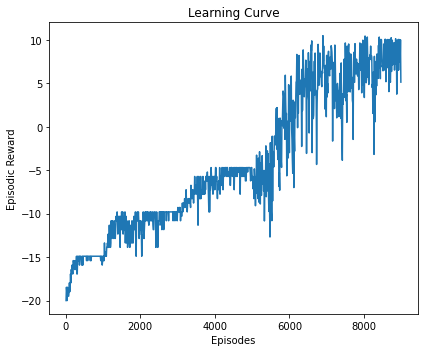

In [ ]:
import pandas as pd

total_rewards = pd.read_csv("switch4.csv", sep=',', header=None).to_numpy()
log_episode_interval = 10
episodes = np.arange(log_episode_interval - 1, total_episodes - 1, log_episode_interval)
episode_rewards = [np.mean(total_rewards[episode - log_episode_interval + 1: episode + 1]) for episode in episodes]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(episodes, episode_rewards)

ax.set_title("Learning Curve")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()

#### Analysis on Performance

For switch4-v0, agents are trained using the same method as switch2-v0 stated above. In terms of training, the experience replay buffer (memory) of the first agent to train is populated with experiences of itself taking random action and the others keeping nooping. Then the subsequent memory of each agent is filled by experiences having the previous trained agents act with their fixed policy from updated Q-Networks, itself playing randomly and the remaining keeping nooping. The first agent is trained by 1000 episodes and the second and third are trained by 2000 episodes with smaller decaying rate of epsilon for more exploration. During training of each agent, only the Q-network of that agent gets updated. The difference between switch4-v0 and switch2-v0 is that the last agent is trained using 4000 episodes with the same decaying rate of epsilon as the second and third. As the level of difficulty to learn to cooperate and reach their home positions increases for each subsequent agent(e.g., it's harder to learn for the second agent than the first and the same for the last and the third), this change allows the latter agents (2nd, 3rd and 4th) to have more exploration and hence leads to convergence.   

The method used for this question as stated above makes the learning process more stable and the convergence is always guranteed (since a limited amount of trial is performed due to long training time, please test this method more than once) compared to the one trained by fixing trained agents' policy and having the others take random actions as it reduces difficulty for each agent to learn to cooperate with other agents in the environment. The learning process is relatively stable similar to the one of switch2-v0. The average total reward gradually increases to around 10 after 9000 episodes' training. A drop in the learning curve appears at the start of the training of the last agent due to high environment complexity because of the interaction with previously trained agents and the environment. It's interesting to notice that sometimes for training of the final agent with the same relatively low epsilon as the previous trained agents, the episodic reward tends to have more oscillation and convergence is achieved at a later stage, which is also possibly due to the higher level of difficulty to learn in the environment. After training, all four agents can reach their home positions efficiently (as is mentioned above, please test this method more than once). 